In [1]:
import sys
sys.path.insert(1, '../')

In [201]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib
import time

In [3]:
df = pd.read_csv('./data/tex_physics.csv')

In [4]:
df['score'].median()

2.0

In [133]:
df[df['score'] == 2.]['n_answers'].median()

1.0

In [130]:
def class_decider(row):
    if row['score'] < 2.:
        return 0
    elif row['score'] > 2.:
        return 1
    else:
        if row['n_answers'] < 1.:
            return 0
        else:
            return 1

In [134]:
df.loc[:, 'y'] = df.apply(class_decider, axis=1)

In [135]:
df['y'].value_counts()

0    186511
1    184785
Name: y, dtype: int64

In [136]:
sample = df.sample(frac=1, random_state=42)

In [137]:
X = sample[['n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks']]

In [138]:
Y = sample['y']

In [139]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [214]:
def find_metrics(method: str, model, X_train, X_val, Y_train, Y_val):
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    print(f'{method}\n\n\
    training accuracy: {accuracy_score(Y_train_pred, Y_train)}\n\
    validation accuracy: {accuracy_score(Y_val_pred, Y_val)}\n\n\
    training f1 score: {f1_score(Y_train_pred, Y_train)}\n\
    validation f1 score: {f1_score(Y_val_pred, Y_val)}\n\n\
    training confusion matrix:\n {confusion_matrix(Y_train_pred, Y_train)}\n\
    validation confusion matrix:\n {confusion_matrix(Y_val_pred, Y_val)}')

In [209]:
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=7)

In [210]:
tic = time.time()
gbc.fit(X_train, Y_train)
toc = time.time()
toc - tic

87.18199896812439

In [224]:
joblib.dump(gbc, './assets/Gradien Boosting Classifier.pkl')

['./assets/Gradien Boosting Classifier.pkl']

In [215]:
find_metrics('Gradient Boosting', gbc, X_train, X_val, Y_train, Y_val)

Gradient Boosting

    training accuracy: 0.6249081402193861
    validation accuracy: 0.5913959188070635

    training f1 score: 0.6161502813246869
    validation f1 score: 0.581549720506031

    training confusion matrix:
 [[84174 51105]
 [46384 78244]]
    validation confusion matrix:
 [[34248 23809]
 [21705 31627]]


<BarContainer object of 11 artists>

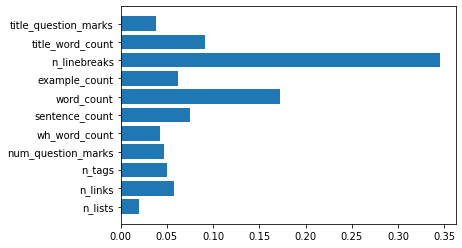

In [216]:
plt.barh(['n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks'], gbc.feature_importances_)

In [217]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=8)

In [218]:
tic = time.time()
rfc.fit(X_train, Y_train)
toc = time.time()
toc - tic

22.92300033569336

In [223]:
joblib.dump(rfc, './assets/Random Forest Classifier.pkl')

['./assets/Random Forest Classifier.pkl']

In [219]:
find_metrics('Random Forest', rfc, X_train, X_val, Y_train, Y_val)

Random Forest

    training accuracy: 0.5912807273370859
    validation accuracy: 0.5879754733411737

    training f1 score: 0.5795957781093306
    validation f1 score: 0.5755297207809624

    training confusion matrix:
 [[80451 56122]
 [50107 73227]]
    validation confusion matrix:
 [[34380 24322]
 [21573 31114]]


<BarContainer object of 11 artists>

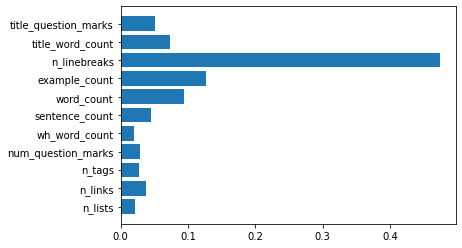

In [220]:
plt.barh(['n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks'], rfc.feature_importances_)